In [25]:
import pandas as pd

df=pd.read_csv("d:/data/ozone/ozone2.csv")
df.head()

,Solar.R,Wind,Temp,Ozone,Result
0,190.000000,7.4,67,41.00000,0
1,118.000000,8.0,72,36.00000,0
2,149.000000,12.6,74,12.00000,0
3,313.000000,11.5,62,18.00000,0
4,185.931507,14.3,56,42.12931,1


D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

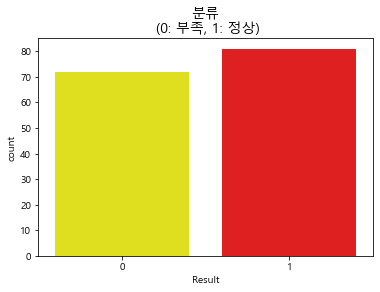

In [26]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

font_name=font_manager.FontProperties(fname="c:/windows/fonts/malgun.ttf").get_name()
rc('font', family=font_name)

colors=['yellow','red']
sns.countplot('Result', data=df, palette=colors)
plt.title('분류\n (0: 부족, 1: 정상)', fontsize=14)
# 불균형 데이터셋

In [27]:
cols=['Solar.R','Wind','Temp']
X=df[cols]
y=df['Result']

array([[<AxesSubplot:xlabel='Solar.R', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Wind', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Temp', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Ozone', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Result', ylabel='Solar.R'>],
       [<AxesSubplot:xlabel='Solar.R', ylabel='Wind'>,
        <AxesSubplot:xlabel='Wind', ylabel='Wind'>,
        <AxesSubplot:xlabel='Temp', ylabel='Wind'>,
        <AxesSubplot:xlabel='Ozone', ylabel='Wind'>,
        <AxesSubplot:xlabel='Result', ylabel='Wind'>],
       [<AxesSubplot:xlabel='Solar.R', ylabel='Temp'>,
        <AxesSubplot:xlabel='Wind', ylabel='Temp'>,
        <AxesSubplot:xlabel='Temp', ylabel='Temp'>,
        <AxesSubplot:xlabel='Ozone', ylabel='Temp'>,
        <AxesSubplot:xlabel='Result', ylabel='Temp'>],
       [<AxesSubplot:xlabel='Solar.R', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Wind', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Temp', ylabel='Ozone'>,
        <AxesSubplot:x

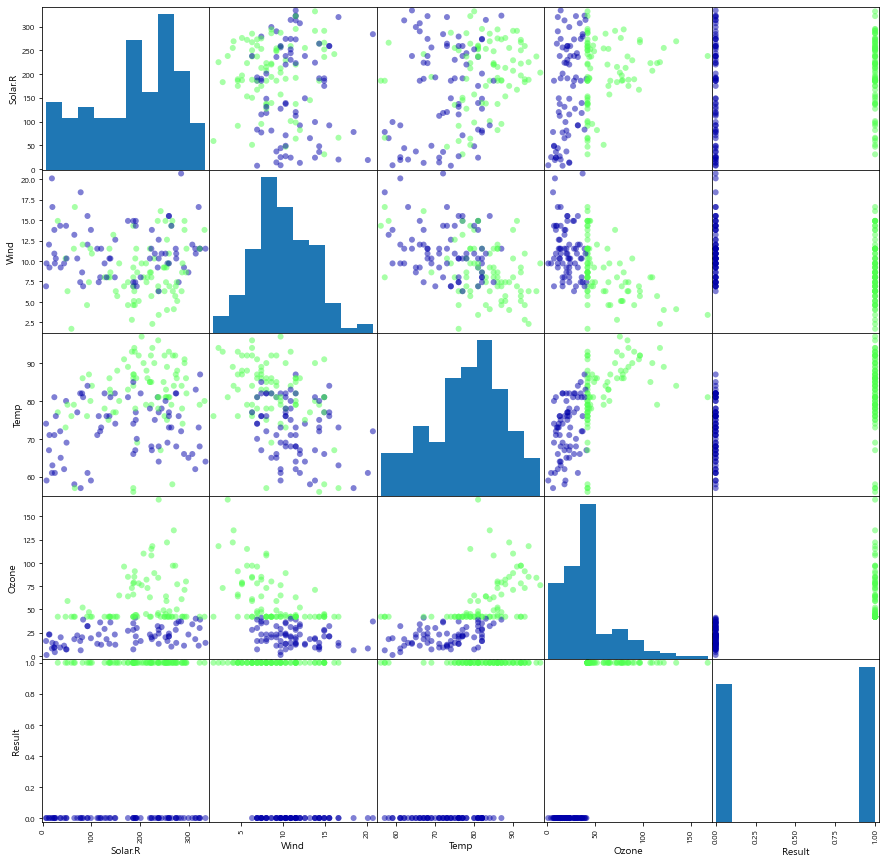

In [28]:
import mglearn
# 산점도 행렬 출력
pd.plotting.scatter_matrix(df, c=y, figsize=(15,15), marker='o', cmap=mglearn.cm3)

In [29]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp=pd.DataFrame(data=X_sample, columns=cols)
y_samp=pd.DataFrame(data=y_sample, columns=['Result'])
df_samp=pd.concat([X_samp, y_samp], axis=1)

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

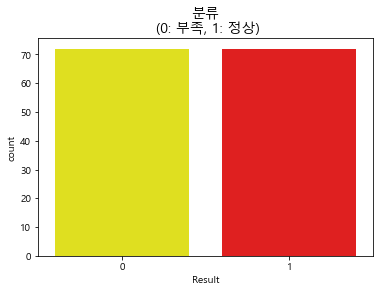

In [30]:
sns.countplot('Result', data=df_samp, palette=colors)
plt.title('분류\n (0: 부족, 1: 정상)', fontsize=14)

In [31]:
cols=['Solar.R','Wind','Temp']
X=X_samp[cols]
y=y_samp['Result']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=10)

In [33]:
from sklearn.neural_network import MLPClassifier

model=MLPClassifier(random_state=42)
model.fit(X_train, y_train)

D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [34]:
import numpy as np

pred=model.predict(X_test)
print("학습용 :", model.score(X_train, y_train))
print("검증용 :", model.score(X_test, y_test))
print("검증용 :", np.mean(pred==y_test))

학습용 : 0.782608695652174
검증용 : 0.6896551724137931
검증용 : 0.6896551724137931


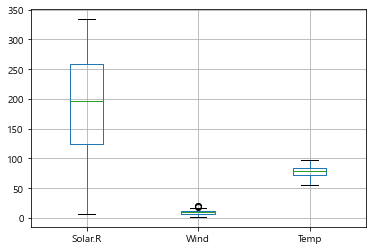

In [35]:
X_train.boxplot()
plt.show()

In [38]:
# Normalization 정규화, 모든 변수의 값이 0~1사이의 값을 갖도록 조정
# 인공 신경망, 딥러닝에서 자주 사용, 변수의 범위를 왜곡하지 않음
# (특정값-최솟값)/(최댓값-최솟값)
# 특정 데이터가 가지는 위치를 보고 싶을 때
# ex) 전체 고객 중 체중이 가장 작은 사람이 40kg, 가장 큰 사람이 120kg일 때
# 40kg → 0으로 변환, 120kg → 1로 변환
# 80kg → (80-40)/(120-40)=0.5로 변환

min_on_training=X_train.min(axis=0) # 학습용 데이터셋에서 특성별 최솟값 계산
range_on_training=(X_train-min_on_training).max(axis=0) # 학습용 데이터셋에서 특성별 (최댓값-최솟값) 계산

# 학습용 데이터셋에서 최솟값을 빼고 범위로 나누면 각 특성에 대해 최솟값은 0, 최댓값은 1로 조정됨
X_train_scaled=(X_train-min_on_training)/range_on_training
# 검증용 데이터셋에서도 같은 작업을 적용, 학습용 데이터셋에서 계산한 최솟값과 범위를 사용
X_test_scaled=(X_test-min_on_training)/range_on_training

print(f"특성별 최솟값\n{X_train_scaled.min(axis=0)}")
print(f"특성별 최댓값\n{X_train_scaled.max(axis=0)}")

특성별 최솟값
Solar.R    0.0
Wind       0.0
Temp       0.0
dtype: float64
특성별 최댓값
Solar.R    1.0
Wind       1.0
Temp       1.0
dtype: float64


In [ ]:
# Standardization 표준화, 평균 0, 표준편차 1
# 데이터를 0을 중심으로 양쪽으로 분포시키는 방법
# 평균을 기준으로 얼마나 떨어져 있는지를 나타내는 값
# (측정값-평균)/표준편차
# k-means, svm 등 거리 기반의 모델에서 주로 사용함
# 변수의 단위가 다른 경우 가중치가 부여되어 노이즈가 생길 수 있다
# 1000원과 1달러 → 가중치가 1000배가 되지 않도록 해야 함

mean_on_train=X_train.mean(axis=0) # 학습용 데이터셋의 변수들의 평균값 계산
std_on_train=X_train.std(axis=0) # 학습용 데이터셋의 변수들의 표준편차 계산

# 값에서 평균을 빼고 표준편차로 나누면 평균 0, 표준편차 1인 데이터로 변환됨
X_train_scaled=(X_train-mean_on_train)/std_on_train
# 검증용 데이터셋에서도 같은 작업을 적용
X_test_scaled=(X_test-mean_on_train)/std_on_train

print(X_train_scaled.describe())
print(X_test_scaled.describe())

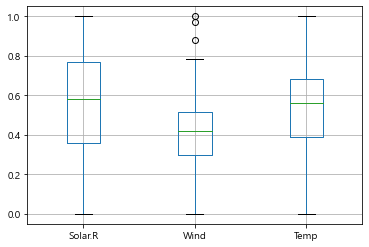

In [39]:
X_train_scaled.boxplot()
plt.show()

In [40]:
# 표준화된 데이터로 다시 훈련
model=MLPClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [41]:
print("학습용 :", model.score(X_train_scaled, y_train))
print("검증용 :", model.score(X_test_scaled, y_test))
# 예측률이 향상됨

학습용 : 0.7391304347826086
검증용 : 0.8275862068965517


In [42]:
# confusion matrix 출력

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test, pred)
cm

array([[ 9,  5],
       [ 4, 11]], dtype=int64)

In [43]:
df_cm=pd.DataFrame(cm, index=[0,1], columns=[0,1])
df_cm

,0,1
0,9,5
1,4,11


<AxesSubplot:title={'center':'Confusion Matrix'}>

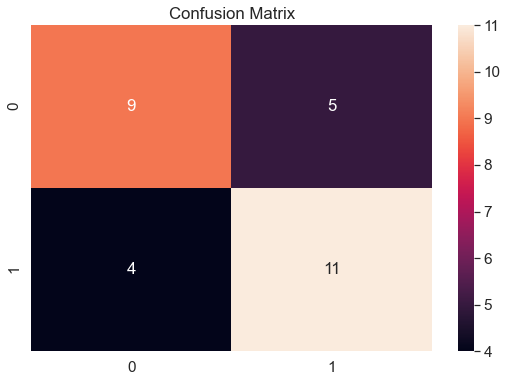

In [44]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)